In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pbp = pd.read_csv('../../Data/play-by-play/pbp_exp12.csv')

In [4]:
injuries_pbp = pbp[pbp['Player-Injured-On-Play']==1]

In [5]:
injuries_pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,OffenseTeam,DefenseTeam,side_of_field,...,is_bad_weather,poor_field_condition,rest_differential,short_rest,pass_run_ratio,offensive_predictability,third_and_long,fourth_down_attempt,blitz_situation,epa
215,1363,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,MIN,ATL,MIN,...,1,0,0.0,0,0.487179,0.012821,0,0,0,1.451649
230,1759,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,MIN,MIN,...,1,0,0.0,0,0.460000,0.040000,0,0,0,-1.132264
238,2041,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,MIN,ATL,...,1,0,0.0,0,0.464286,0.035714,0,0,0,-0.008446
335,518,2019_01_BAL_MIA,2019090803,MIA,BAL,REG,1,MIA,BAL,MIA,...,1,1,0.0,0,0.533333,0.033333,0,0,0,1.426173
450,3347,2019_01_BAL_MIA,2019090803,MIA,BAL,REG,1,BAL,MIA,MIA,...,1,1,0.0,0,0.561224,0.061224,0,0,1,0.996652


Injuries by Quarter

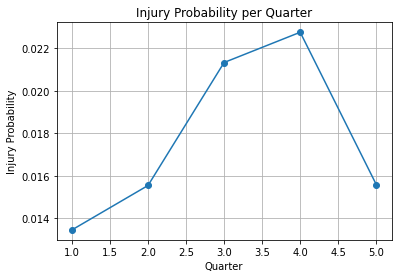

In [6]:
injury_probs = injuries_pbp['Quarter'].value_counts() / pbp['Quarter'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.plot(injury_probs.index, injury_probs.values, marker='o')
plt.xlabel('Quarter')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per Quarter')
plt.grid(True)
plt.show()

Injuries by PlayType

In [7]:
injuries_pbp['play_type'].value_counts(dropna=False)

pass           852
run            605
no_play         69
punt            48
kickoff         39
field_goal       4
extra_point      2
Name: play_type, dtype: int64

In [8]:
pbp['play_type'].value_counts() #can't relabel 5000 no plays
#possibly should drop kneels and spikes

pass           40086
run            27660
kickoff         5614
no_play         5013
punt            4237
extra_point     2660
field_goal      2033
qb_kneel         869
qb_spike         164
Name: play_type, dtype: int64

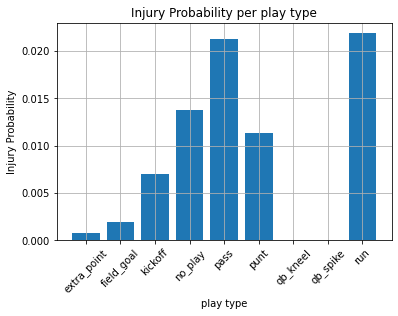

In [9]:
injury_probs = injuries_pbp['play_type'].value_counts() / pbp['play_type'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.bar(injury_probs.index, injury_probs.values)
plt.xlabel('play type')
plt.xticks(rotation=45)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per play type')
plt.grid(True)
plt.show()

Injuries by Formation

In [10]:
injuries_pbp['offense_formation'].value_counts(dropna=False)

SHOTGUN         825
SINGLEBACK      400
I_FORM          134
EMPTY           102
PUNT             50
PISTOL           40
KICKOFF          40
JUMBO            15
FIELD_GOAL        6
UNDER CENTER      4
WILDCAT           3
Name: offense_formation, dtype: int64

In [11]:
basic_formation_mapping = {'SHOTGUN':'SHOTGUN', 'SINGLEBACK' : 'PISTOL', 'I_FORM' : 'PISTOL', 'EMPTY' : 'SHOTGUN',
                           'PUNT' : 'PUNT', 'PISTOL' : 'PISTOL', 'KICKOFF' : 'KICKOFF', 'JUMBO' : 'PISTOL',
                           'FIELD_GOAL' : 'FIELD_GOAL', 'UNDER CENTER' : 'PISTOL', 'WILDCAT' : 'WILDCAT'}

injuries_pbp['basic_formation'] = injuries_pbp['offense_formation'].replace(basic_formation_mapping)
pbp['basic_formation'] = pbp['offense_formation'].replace(basic_formation_mapping)
injuries_pbp['basic_formation'].value_counts(dropna=False)

/var/folders/6s/frb3c33d19nbynjcbrvxx7t80000gn/T/ipykernel_4474/1632551358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_pbp['basic_formation'] = injuries_pbp['offense_formation'].replace(basic_formation_mapping)


SHOTGUN       927
PISTOL        593
PUNT           50
KICKOFF        40
FIELD_GOAL      6
WILDCAT         3
Name: basic_formation, dtype: int64

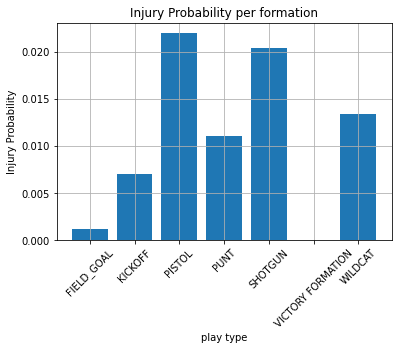

In [12]:
injury_probs = injuries_pbp['basic_formation'].value_counts() / pbp['basic_formation'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.bar(injury_probs.index, injury_probs.values)
plt.xlabel('play type')
plt.xticks(rotation=45)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per formation')
plt.grid(True)
plt.show()

Formation-PlayType combination

In [13]:
injuries_pbp['Formation-PlayType'] = injuries_pbp['basic_formation'] + '-' + injuries_pbp['play_type']
pbp['Formation-PlayType'] = pbp['basic_formation'] + '-' + pbp['play_type']
injuries_pbp['Formation-PlayType'].value_counts(dropna=False)

/var/folders/6s/frb3c33d19nbynjcbrvxx7t80000gn/T/ipykernel_4474/2083644835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_pbp['Formation-PlayType'] = injuries_pbp['basic_formation'] + '-' + injuries_pbp['play_type']


SHOTGUN-pass              661
PISTOL-run                379
SHOTGUN-run               224
PISTOL-pass               190
PUNT-punt                  48
SHOTGUN-no_play            42
KICKOFF-kickoff            39
PISTOL-no_play             24
FIELD_GOAL-field_goal       4
WILDCAT-run                 2
FIELD_GOAL-extra_point      2
PUNT-no_play                2
WILDCAT-pass                1
KICKOFF-no_play             1
Name: Formation-PlayType, dtype: int64

In [14]:
injuries_pbp[['play_type', 'basic_formation', 'Formation-PlayType']].nunique()

play_type              7
basic_formation        6
Formation-PlayType    14
dtype: int64

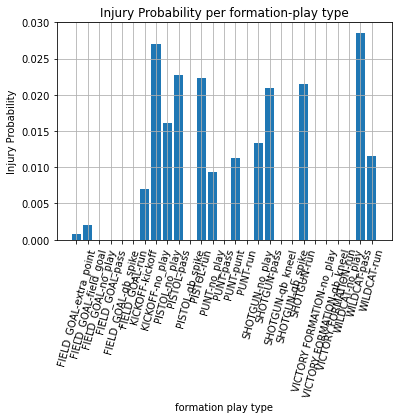

In [15]:
injury_probs = injuries_pbp['Formation-PlayType'].value_counts() / pbp['Formation-PlayType'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.bar(injury_probs.index, injury_probs.values)
plt.xlabel('formation play type')
plt.xticks(rotation=75)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per formation-play type')
plt.grid(True)
plt.show()

Surface and Roof

In [16]:
injuries_pbp['surface_type'].value_counts(dropna=False)

grass         962
fieldturf     372
astroturf     175
sportturf      57
matrixturf     53
Name: surface_type, dtype: int64

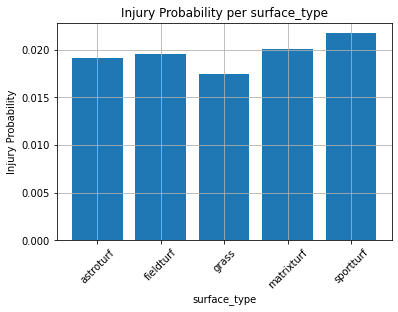

In [17]:
injury_probs = injuries_pbp['surface_type'].value_counts() / pbp['surface_type'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.bar(injury_probs.index, injury_probs.values)
plt.xlabel('surface_type')
plt.xticks(rotation=45)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per surface_type')
plt.grid(True)
plt.show()

/var/folders/6s/frb3c33d19nbynjcbrvxx7t80000gn/T/ipykernel_4474/1050104736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_pbp['surface_type2'] = ['grass' if i=='grass' else 'turf' for i in list(injuries_pbp['surface_type'])]


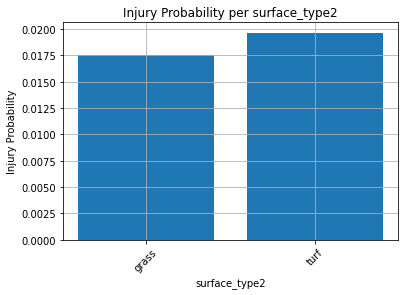

In [18]:
injuries_pbp['surface_type2'] = ['grass' if i=='grass' else 'turf' for i in list(injuries_pbp['surface_type'])]
pbp['surface_type2'] = ['grass' if i=='grass' else 'turf' for i in list(pbp['surface_type'])]

injury_probs = injuries_pbp['surface_type2'].value_counts() / pbp['surface_type2'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.bar(injury_probs.index, injury_probs.values)
plt.xlabel('surface_type2')
plt.xticks(rotation=45)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per surface_type2')
plt.grid(True)
plt.show()

In [19]:
injuries_pbp['roof'].value_counts(dropna=False)

outdoors    1082
dome         264
closed       253
open          20
Name: roof, dtype: int64

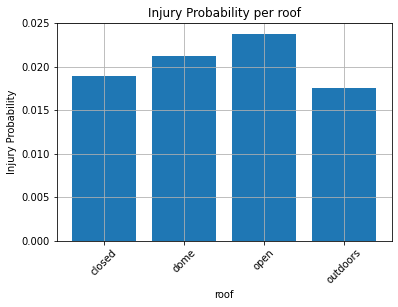

In [20]:
injury_probs = injuries_pbp['roof'].value_counts() / pbp['roof'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure quarters are in order

plt.bar(injury_probs.index, injury_probs.values)
plt.xlabel('roof')
plt.xticks(rotation=45)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per roof')
plt.grid(True)
plt.show()

**Yards Gained**

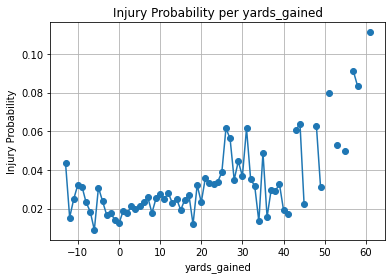

In [21]:
injury_probs = injuries_pbp['yards_gained'].value_counts() / pbp['yards_gained'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order

plt.plot(injury_probs.index, injury_probs.values, marker='o')
plt.xlabel('yards_gained')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per yards_gained')
plt.grid(True)
plt.show()

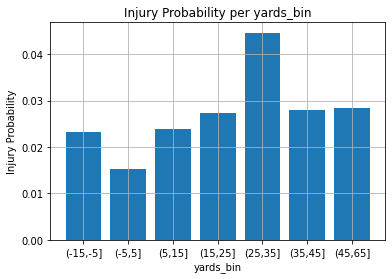

In [22]:
bins = [-15, -5, 5, 15, 25, 35, 45, 65]  # merges 45–55 and 55–65 into one bin
labels = ['(-15,-5]', '(-5,5]', '(5,15]', '(15,25]', '(25,35]', '(35,45]', '(45,65]']
pbp['yards_bin'] = pd.cut(pbp['yards_gained'], bins=bins, labels=labels, include_lowest=True)

injuries_pbp = pbp[pbp['Player-Injured-On-Play']==1]

injury_probs = injuries_pbp['yards_bin'].value_counts() / pbp['yards_bin'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order

plt.bar(injury_probs.index.astype(str), injury_probs.values)
plt.xlabel('yards_bin')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per yards_bin')
plt.grid(True)
plt.show()

**Down and Distance**

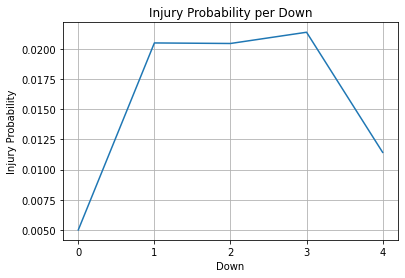

In [23]:
injury_probs = injuries_pbp['Down'].value_counts() / pbp['Down'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order

plt.plot(injury_probs.index.astype(str), injury_probs.values)
plt.xlabel('Down')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per Down')
plt.grid(True)
plt.show()

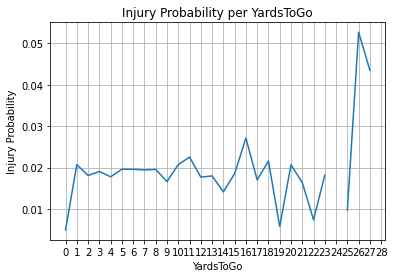

In [24]:
injury_probs = injuries_pbp['YardsToGo'].value_counts() / pbp['YardsToGo'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order

plt.plot(injury_probs.index.astype(str), injury_probs.values)
plt.xlabel('YardsToGo')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per YardsToGo')
plt.grid(True)
plt.show()

**Yardline**

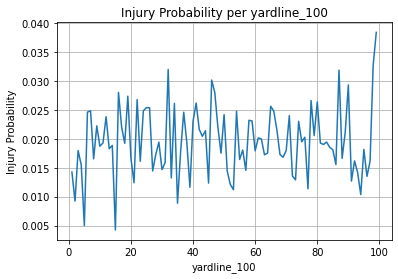

In [25]:
injury_probs = injuries_pbp['yardline_100'].value_counts() / pbp['yardline_100'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order

plt.plot(injury_probs.index, injury_probs.values)
plt.xlabel('yardline_100')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per yardline_100')
plt.grid(True)
plt.show()

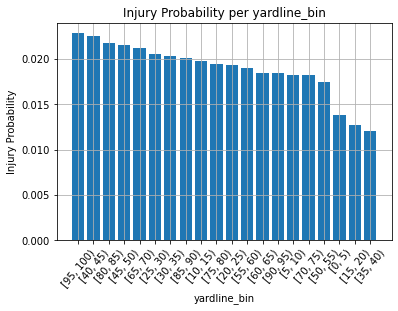

In [26]:
pbp['yardline_bin'] = pd.cut(pbp['yardline_100'], bins=range(0, 105, 5), right=False)
injuries_pbp = pbp[pbp['Player-Injured-On-Play']==1]

injury_probs = injuries_pbp['yardline_bin'].value_counts() / pbp['yardline_bin'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order
injury_probs = injury_probs.sort_values(ascending=False)

plt.bar(injury_probs.index.astype(str), injury_probs.values)
plt.xlabel('yardline_bin')
plt.xticks(rotation=50)
plt.ylabel('Injury Probability')
plt.title('Injury Probability per yardline_bin')
plt.grid(True)
plt.show()

**GSR**

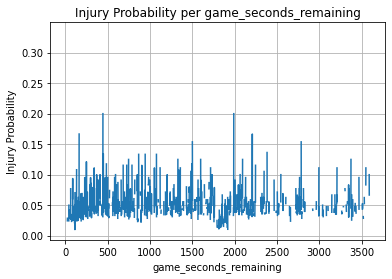

In [27]:
injury_probs = injuries_pbp['game_seconds_remaining'].value_counts() / pbp['game_seconds_remaining'].value_counts()
injury_probs = injury_probs.sort_index()  # ensure yards_gaineds are in order

plt.plot(injury_probs.index, injury_probs.values)
plt.xlabel('game_seconds_remaining')
plt.ylabel('Injury Probability')
plt.title('Injury Probability per game_seconds_remaining')
plt.grid(True)
plt.show()

In [28]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'OffenseTeam', 'DefenseTeam', 'side_of_field',
       'yardline_100', 'date', 'quarter_seconds_remaining',
       'half_seconds_remaining', 'game_seconds_remaining', 'game_half',
       'drive', 'Quarter', 'Down', 'YardsToGo', 'Description', 'play_type',
       'yards_gained', 'Offteam_score', 'defteam_score', 'score_differential',
       'season', 'series', 'stadium', 'play_type_nfl', 'drive_play_count',
       'drive_time_of_possession', 'roof', 'surface_type', 'num_plays',
       'num_injuries', 'Avg_Temp', 'Avg_Percipitation_Prob_Percent',
       'HOME_day_since_last_game', 'AWAY_day_since_last_game',
       'total_play_count', 'home_team_on_offense', 'home_team_on_defense',
       'offense_formation', 'defenders_in_box', 'pass_count', 'run_count',
       'Previous_DEF_rank', 'current_defence_rank', 'Player-Injured-On-Play',
       'Temperature', 'Precipitation', 'temperature_grade',

## Distribution of EPA

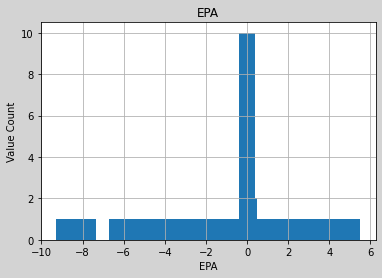

In [ ]:
epa_counts = pd.DataFrame(injuries_pbp['epa'].value_counts()).reset_index()
epa_counts.columns = ['epa', 'value count']

plt.figure(facecolor='lightgrey')  # Set the figure background color
plt.bar(epa_counts['epa'], epa_counts['value count'])
plt.xlabel('EPA')
plt.ylabel('Value Count')
plt.title('EPA')
plt.grid(True)
plt.show()